<a href="https://colab.research.google.com/github/Namratha0506/CHORNIC-KIDNEY-DISEASES-PROJECT-/blob/main/Namratha_Kidney_disease_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset

In [4]:
# Load the dataset (Assuming it's in CSV format)
data = pd.read_csv('/content/Namratha_Kidney_disease_Dataset (1).csv')
print(data.head())

    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1    NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]


# Data Preprocessing

In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values
data.dropna(inplace=True)  # Alternatively, use data.fillna(method='ffill', inplace=True)

# Convert categorical variables to numerical (if any)
data['class'] = data['class'].map({'ckd': 1, 'notckd': 0})  # Assuming 'ckd' and 'notckd'



age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [ ]:
print(data['class'])

3      1
9      1
11     1
14     1
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 158, dtype: int64


In [ ]:
data['class'].head()

,class
3,1
9,1
11,1
14,1
20,1


## # Features and target variable

In [ ]:
# Features and target variable
X = data.drop('class', axis=1)
y = data['class']

In [ ]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,10.8,32.0,4500.0,3.8,yes,yes,no,poor,yes,no
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,5.6,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,7.7,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [ ]:
y

,class
3,1
9,1
11,1
14,1
20,1
...,...
395,0
396,0
397,0
398,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical variables to integers using Label Encoding
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
label_encoder = LabelEncoder()

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Encode categorical columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# Check the transformed dataset
print(data.head())

     age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...   pcv     wbcc  \
3   48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  32.0   6700.0   
9   53.0  90.0  1.020  2.0  0.0    0   0    1   0   70.0  ...  29.0  12100.0   
11  63.0  70.0  1.010  3.0  0.0    0   0    1   0  380.0  ...  32.0   4500.0   
14  68.0  80.0  1.010  3.0  2.0    1   0    1   1  157.0  ...  16.0  11000.0   
20  61.0  80.0  1.015  2.0  0.0    0   0    0   0  173.0  ...  24.0   9200.0   

    rbcc  htn  dm  cad  appet  pe  ane  class  
3    3.9    1   0    0      1   1    1      1  
9    3.7    1   1    0      1   0    1      1  
11   3.8    1   1    0      1   1    0      1  
14   2.6    1   1    1      1   1    0      1  
20   3.2    1   1    1      1   1    1      1  

[5 rows x 25 columns]


In [ ]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,1,0,1,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,32.0,4500.0,3.8,1,1,0,1,1,0,1
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,16.0,11000.0,2.6,1,1,1,1,1,0,1
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,24.0,9200.0,3.2,1,1,1,1,1,1,1


In [ ]:
data['class']

,class
3,1
9,1
11,1
14,1
20,1
...,...
395,0
396,0
397,0
398,0


In [ ]:
# Check if there are any NaNs in the target variable after mapping
if data['class'].isnull().any():
    print("There are NaNs in the target variable. Dropping rows with NaN in 'class'.")
    data.dropna(subset=['class'], inplace=True)

In [ ]:
data['class']

,class
3,1
9,1
11,1
14,1
20,1
...,...
395,0
396,0
397,0
398,0


In [ ]:
y

,class
3,1
9,1
11,1
14,1
20,1
...,...
395,0
396,0
397,0
398,0


In [ ]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,1,0,1,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,32.0,4500.0,3.8,1,1,0,1,1,0,1
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,16.0,11000.0,2.6,1,1,1,1,1,0,1
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,24.0,9200.0,3.2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,0


In [ ]:
# Features and target variable
X = data.drop('class', axis=1)
y = data['class']

In [ ]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,9.5,29.0,12100.0,3.7,1,1,0,1,0,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,10.8,32.0,4500.0,3.8,1,1,0,1,1,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,5.6,16.0,11000.0,2.6,1,1,1,1,1,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,7.7,24.0,9200.0,3.2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Handle imbalanced dataset with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Check the distribution of the classes
print("\nOriginal class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_resampled.value_counts())


Original class distribution: class
0    92
1    34
Name: count, dtype: int64
Resampled class distribution: class
0    92
1    92
Name: count, dtype: int64


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(1, activation='sigmoid'))  # Binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:

# Train the model
history = model.fit(X_train_resampled, y_train_resampled,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9194 - loss: 0.1928 - val_accuracy: 1.0000 - val_loss: 0.1318
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9463 - loss: 0.1473 - val_accuracy: 1.0000 - val_loss: 0.1140
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9534 - loss: 0.1373 - val_accuracy: 1.0000 - val_loss: 0.0998
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9674 - loss: 0.1460 - val_accuracy: 1.0000 - val_loss: 0.0878
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9533 - loss: 0.1259 - val_accuracy: 1.0000 - val_loss: 0.0775
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9500 - loss: 0.1369 - val_accuracy: 1.0000 - val_loss: 0.0681
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9645 - loss: 0.1042 - val_accuracy: 1.0000 - val_loss: 0.0608
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9754 - loss: 0.1011 - val_accuracy: 1.0000 - val_loss: 0.0541


In [ ]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



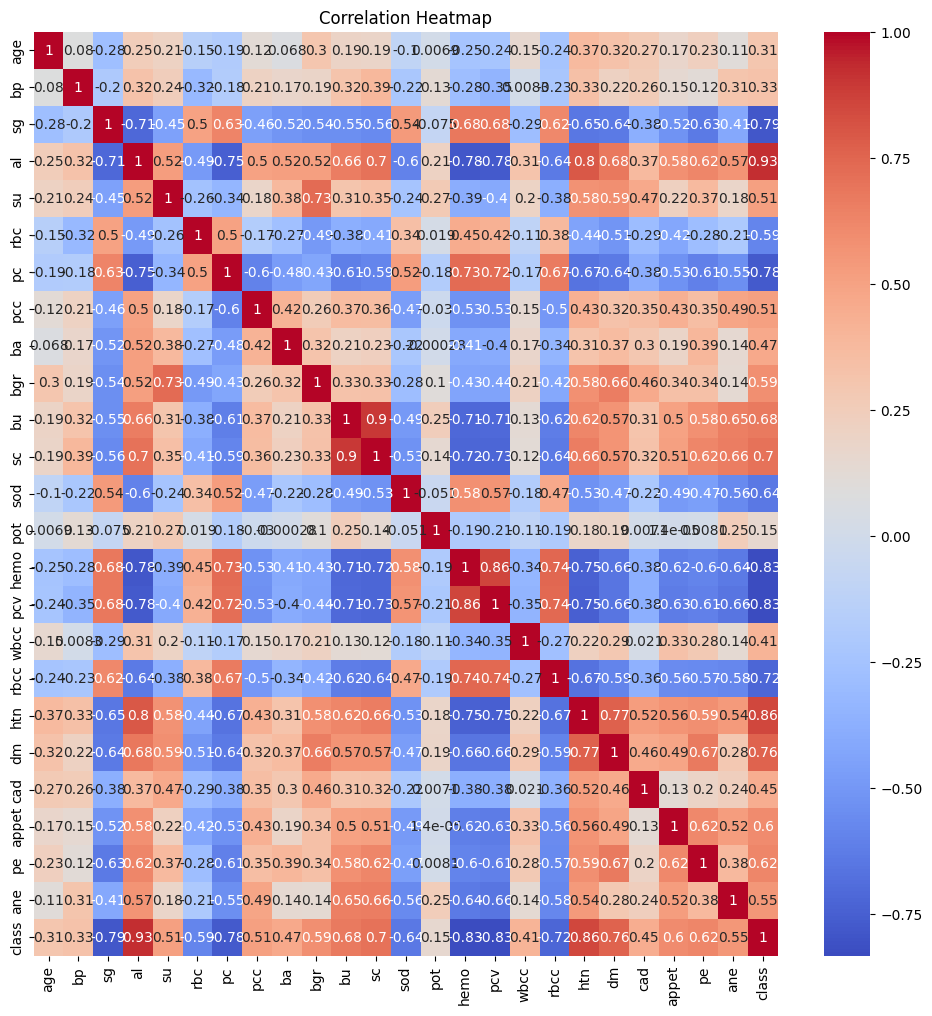

In [ ]:
# Correlation matrix to understand relationships between energy metrics
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

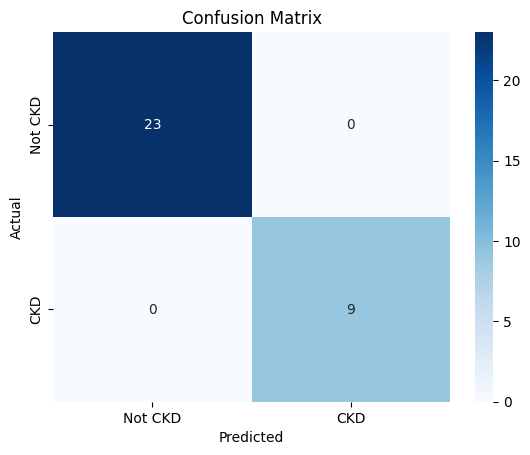

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

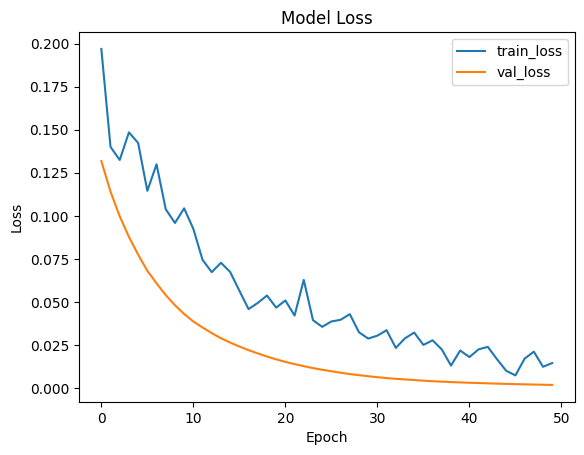

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

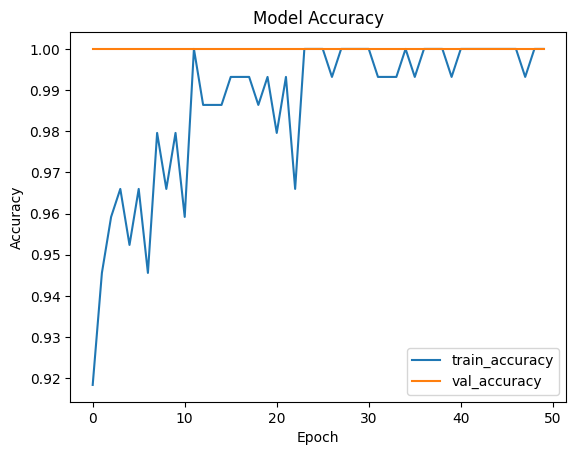

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()